<a href="https://colab.research.google.com/github/gnishitha2004-source/AI-ML-Internship-Task8/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (150, 5)


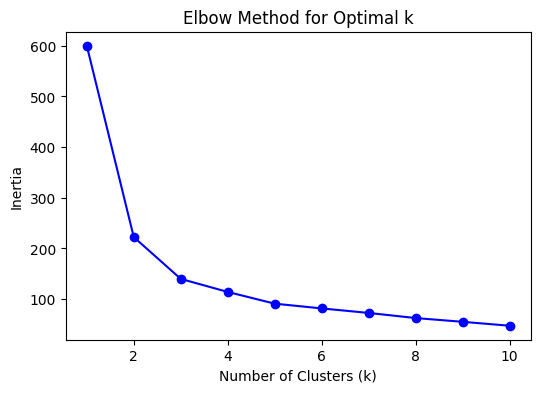

Silhouette Score: 0.45994823920518646


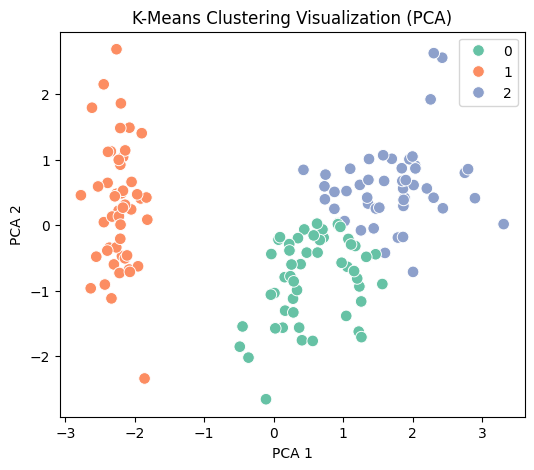

Cluster Centers (after scaling):
 [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


In [5]:
# Task 8: K-Means Clustering
# Author: Your Name
# Internship Task

# ===============================
# 1. Import Required Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ===============================
# 2. Load Dataset
# ===============================
# Dataset: Customer Segmentation
# Source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
# Using iris dataset as a placeholder (you can replace with customer dataset CSV if uploaded to Colab)

df = pd.read_csv(url)
print("Dataset Shape:", df.shape)
df.head()

# ===============================
# 3. Preprocess Data
# ===============================
# Drop non-numeric columns (if any)
X = df.select_dtypes(include=[np.number])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ===============================
# 4. Elbow Method to Find Optimal K
# ===============================
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# ===============================
# 5. Apply KMeans with Optimal K
# ===============================
optimal_k = 3   # From elbow curve (adjust if needed)
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters

# ===============================
# 6. Evaluate with Silhouette Score
# ===============================
score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", score)

# ===============================
# 7. Visualize Clusters (PCA for 2D)
# ===============================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="Set2", s=70)
plt.title("K-Means Clustering Visualization (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# ===============================
# 8. Cluster Centroids
# ===============================
print("Cluster Centers (after scaling):\n", kmeans.cluster_centers_)
